<a href="https://colab.research.google.com/github/Eugene-dev-opps/ASSIGNMENT-ZDS/blob/main/DATASCIENCE%20ASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [27]:
file_path = '/mnt/data/students.csv'
students_df = pd.read_csv(file_path)

In [28]:
students_df.head()

,YearofStudy,Course,Age,ApproxHeight,ApproxWeight,KCSE,Yr_JoinCampus,SitKCSE,Expense_Semester,Expense_Accommodation,Previous_Exam_MeanGrade
0,Second Year,MATHEMATICS,20,152,80,2016,2018,Central,8744,6043,B
1,First Year,ECONOMICS AND STATISTICS,29,182,79,2010,2010,Rift Valley,26293,14782,B
2,Fourth Year,MATHEMATICS,22,167,64,2015,2016,Western,44105,19224,B
3,Second Year,ECONOMICS AND STATISTICS,23,149,52,2016,2018,Coast,33954,18795,B
4,Second Year,MATHEMATICS,18,150,70,2013,2018,Western,18113,25569,A


In [29]:
missing_values = students_df.isnull().sum()

In [30]:
numerical_stats = students_df.describe()

In [31]:
data_types = students_df.dtypes

missing_values, numerical_stats, data_types

(YearofStudy                0
 Course                     0
 Age                        0
 ApproxHeight               0
 ApproxWeight               0
 KCSE                       0
 Yr_JoinCampus              0
 SitKCSE                    0
 Expense_Semester           0
 Expense_Accommodation      0
 Previous_Exam_MeanGrade    0
 dtype: int64,
             Age  ApproxHeight  ApproxWeight         KCSE  Yr_JoinCampus  \
 count  62.00000     62.000000     62.000000    62.000000      62.000000   
 mean   22.16129    158.064516     62.161290  2015.290323    2016.419355   
 std     2.47077     13.583827      9.970766     1.796053       2.076791   
 min    18.00000    122.000000     45.000000  2010.000000    2010.000000   
 25%    21.00000    149.250000     54.000000  2015.000000    2016.000000   
 50%    22.00000    157.000000     59.500000  2016.000000    2017.000000   
 75%    23.00000    167.000000     68.750000  2016.000000    2017.000000   
 max    34.00000    200.000000     80.000000  2

In [32]:
encoded_df = pd.get_dummies(students_df, columns=['YearofStudy', 'Course', 'SitKCSE', 'Previous_Exam_MeanGrade'], drop_first=True)

In [33]:
encoded_df.head()

,Age,ApproxHeight,ApproxWeight,KCSE,Yr_JoinCampus,Expense_Semester,Expense_Accommodation,YearofStudy_Fourth Year,YearofStudy_Second Year,YearofStudy_Third Year,...,Course_URBAN PLANNING,SitKCSE_Coast,SitKCSE_Eastern,SitKCSE_Nairobi,SitKCSE_Nyanza,SitKCSE_Rift Valley,SitKCSE_Western,Previous_Exam_MeanGrade_B,Previous_Exam_MeanGrade_C,Previous_Exam_MeanGrade_E
0,20,152,80,2016,2018,8744,6043,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,29,182,79,2010,2010,26293,14782,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,22,167,64,2015,2016,44105,19224,True,False,False,...,False,False,False,False,False,False,True,True,False,False
3,23,149,52,2016,2018,33954,18795,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,18,150,70,2013,2018,18113,25569,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
numerical_features = ['Age', 'ApproxHeight', 'ApproxWeight', 'KCSE', 'Yr_JoinCampus', 'Expense_Semester', 'Expense_Accommodation']

In [36]:
scaler = StandardScaler()

In [37]:
encoded_df[numerical_features] = scaler.fit_transform(encoded_df[numerical_features])

In [38]:
encoded_df.head()

,Age,ApproxHeight,ApproxWeight,KCSE,Yr_JoinCampus,Expense_Semester,Expense_Accommodation,YearofStudy_Fourth Year,YearofStudy_Second Year,YearofStudy_Third Year,...,Course_URBAN PLANNING,SitKCSE_Coast,SitKCSE_Eastern,SitKCSE_Nairobi,SitKCSE_Nyanza,SitKCSE_Rift Valley,SitKCSE_Western,Previous_Exam_MeanGrade_B,Previous_Exam_MeanGrade_C,Previous_Exam_MeanGrade_E
0,-0.881884,-0.450096,1.803706,0.398357,0.767313,-1.479965,-1.543577,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,2.790440,1.776442,1.702594,-2.969572,-3.116230,-0.145623,-0.851376,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,-0.065812,0.663173,0.185915,-0.162964,-0.203573,1.208715,-0.499532,True,False,False,...,False,False,False,False,False,False,True,True,False,False
3,0.342224,-0.672750,-1.027428,0.398357,0.767313,0.436882,-0.533513,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,-1.697956,-0.598532,0.792587,-1.285608,0.767313,-0.767591,0.003044,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

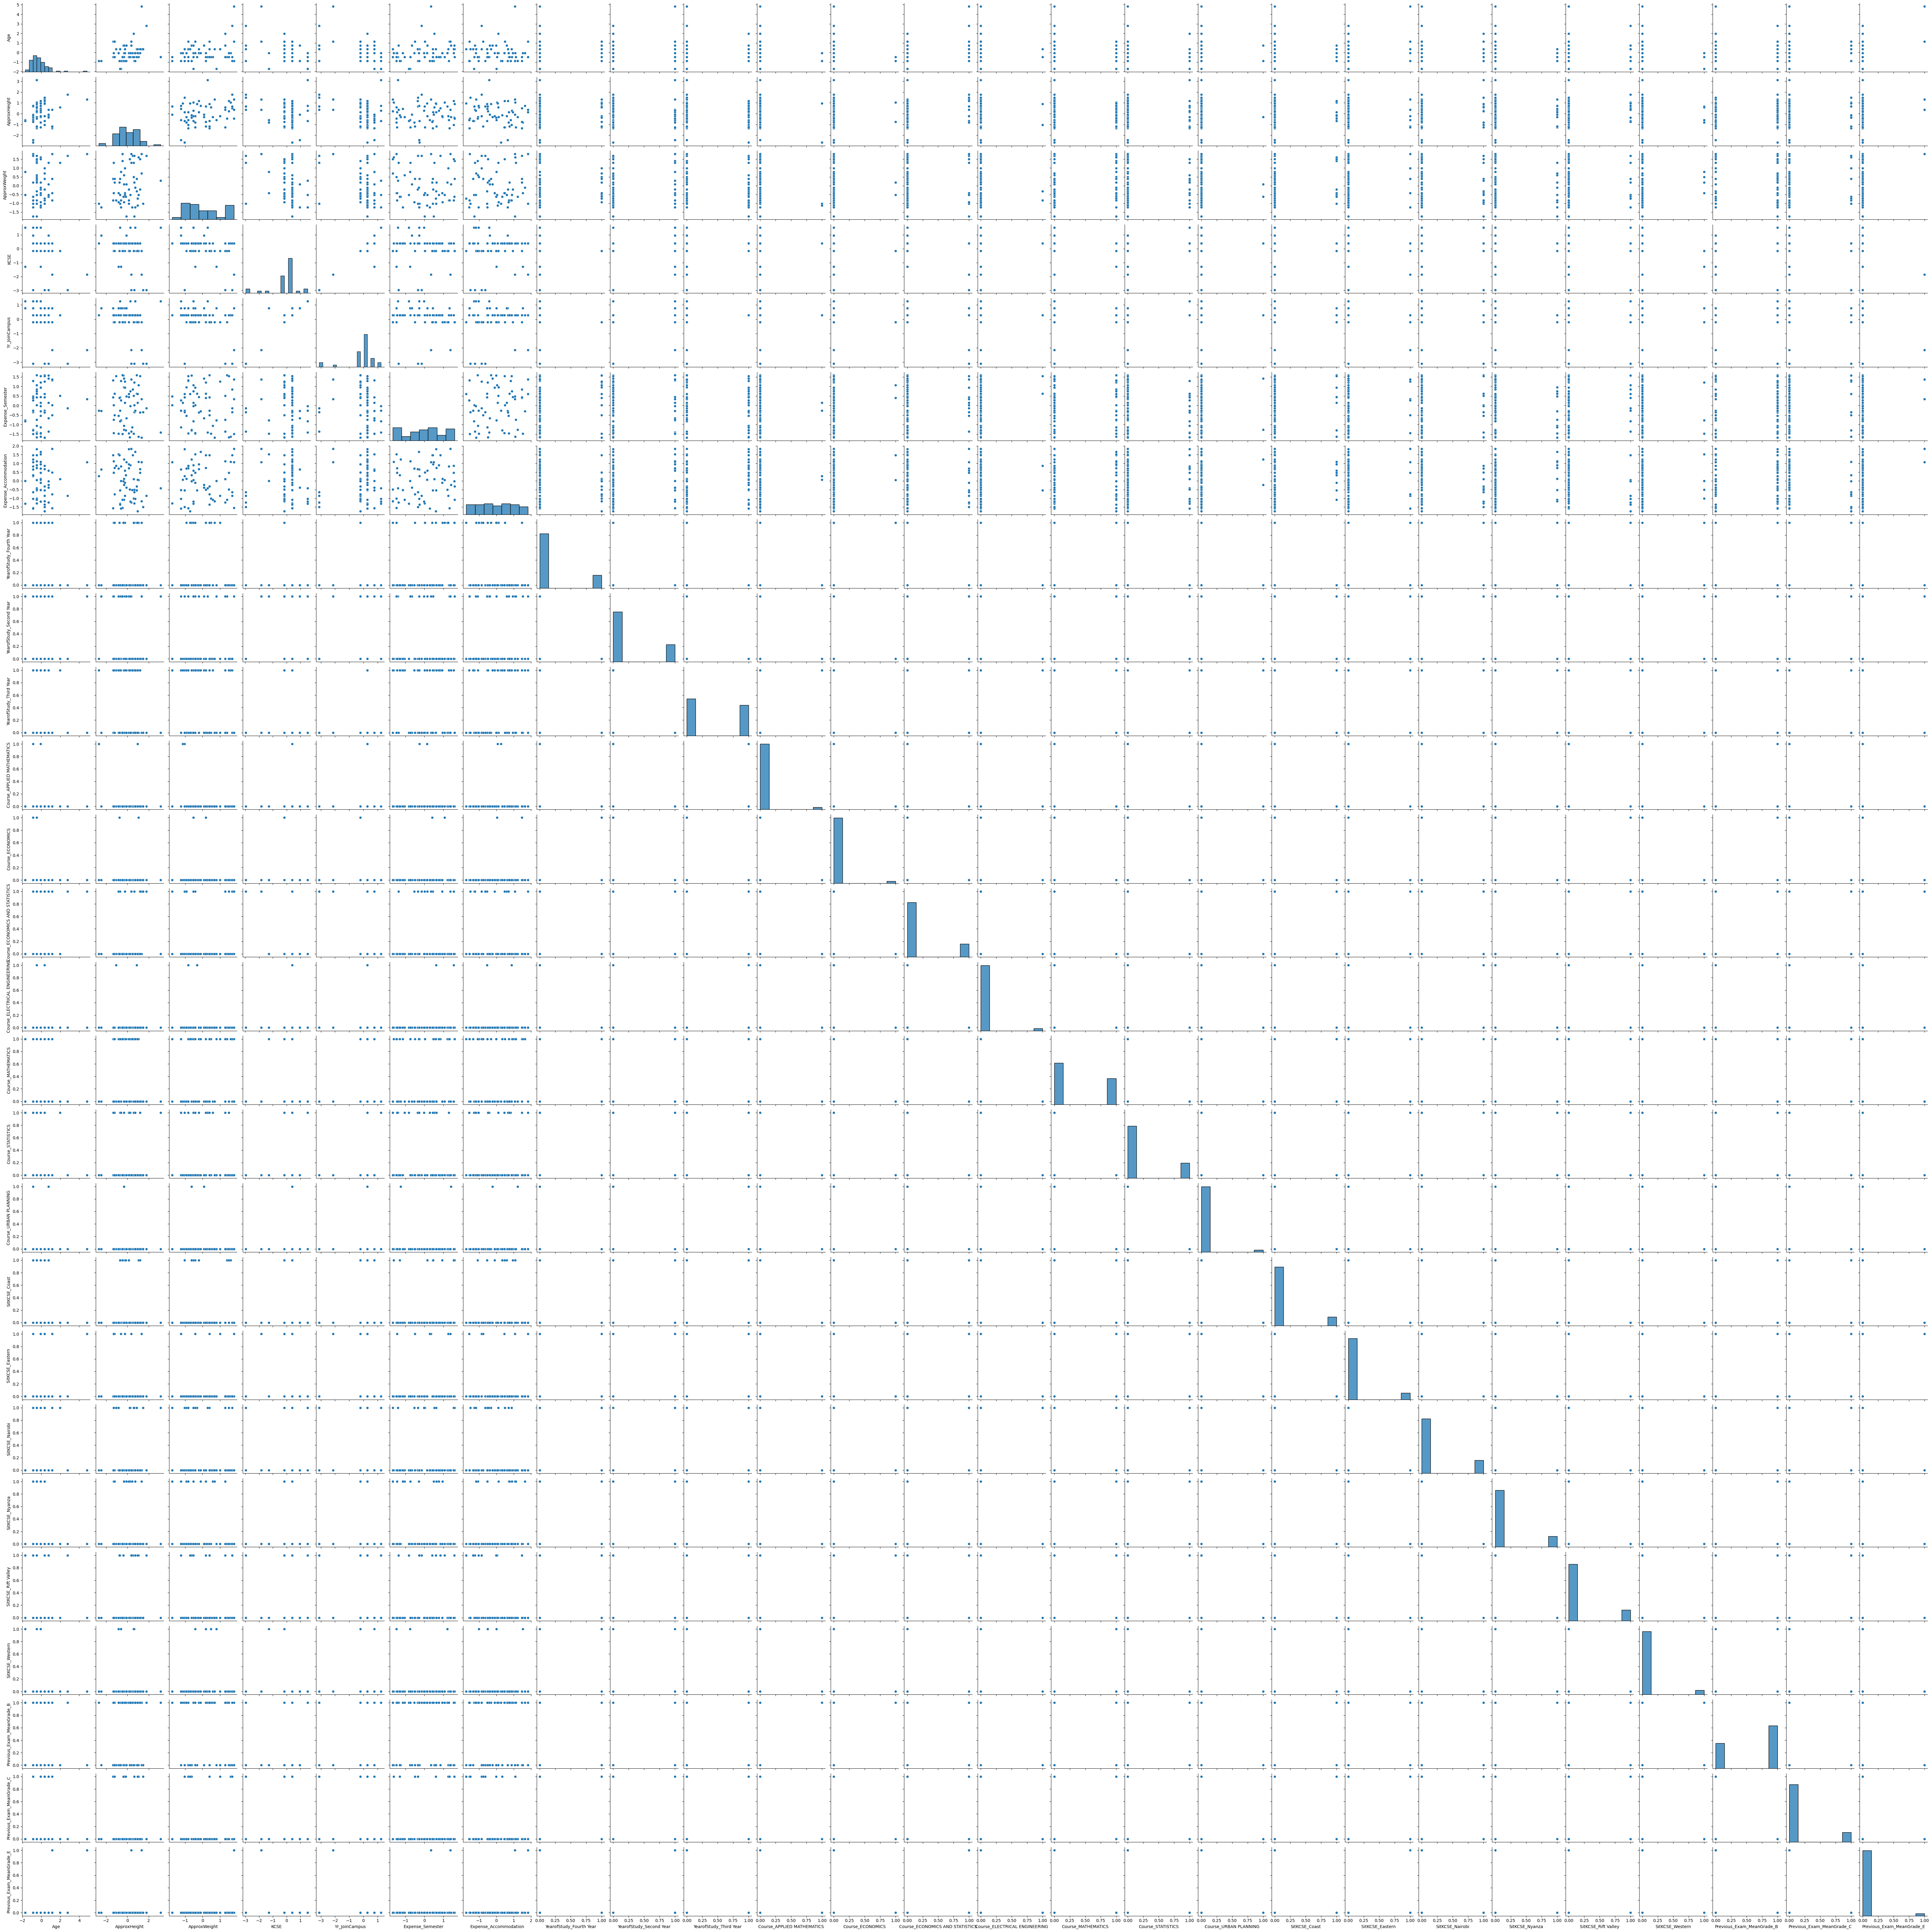

In [42]:
sns.pairplot(encoded_df)
plt.show()

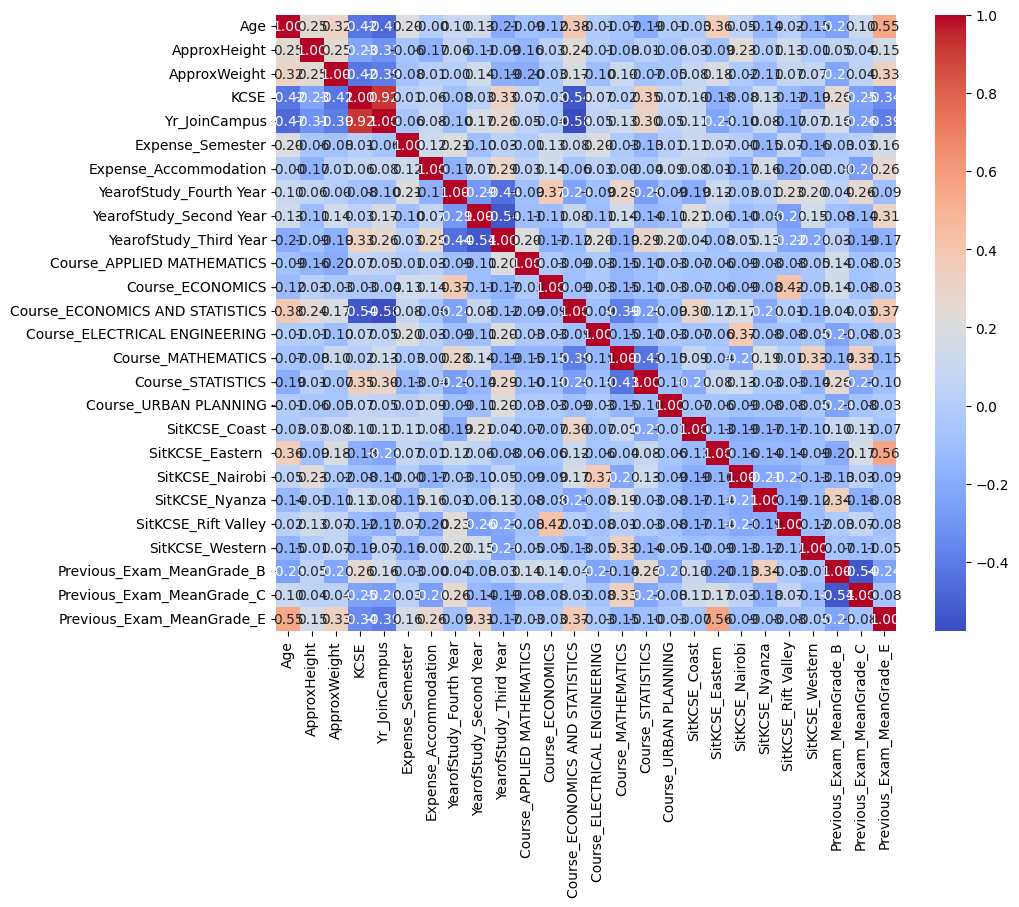

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [49]:
target_column = 'Previous_Exam_MeanGrade_B'

In [50]:
X = encoded_df.drop(columns=[target_column])
y = encoded_df[target_column]

In [51]:
X.head(), y.head()

(        Age  ApproxHeight  ApproxWeight      KCSE  Yr_JoinCampus  \
 0 -0.881884     -0.450096      1.803706  0.398357       0.767313   
 1  2.790440      1.776442      1.702594 -2.969572      -3.116230   
 2 -0.065812      0.663173      0.185915 -0.162964      -0.203573   
 3  0.342224     -0.672750     -1.027428  0.398357       0.767313   
 4 -1.697956     -0.598532      0.792587 -1.285608       0.767313   
 
    Expense_Semester  Expense_Accommodation  YearofStudy_Fourth Year  \
 0         -1.479965              -1.543577                    False   
 1         -0.145623              -0.851376                    False   
 2          1.208715              -0.499532                     True   
 3          0.436882              -0.533513                    False   
 4         -0.767591               0.003044                    False   
 
    YearofStudy_Second Year  YearofStudy_Third Year  ...  Course_STATISTICS  \
 0                     True                   False  ...              F

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [54]:
target_column = 'Previous_Exam_MeanGrade_B'


X = encoded_df.drop(columns=[target_column])
y = encoded_df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluating model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5384615384615384
              precision    recall  f1-score   support

       False       0.17      0.50      0.25         2
        True       0.86      0.55      0.67        11

    accuracy                           0.54        13
   macro avg       0.51      0.52      0.46        13
weighted avg       0.75      0.54      0.60        13



1) Which type of machine learning algorithm would be most suitable for this task? Explain your reasoning.

-Random Forests or Gradient Boosting Machines are suitable due to their robustness and ability to handle complex, non-linear relationships. Logistic Regression is also good for its simplicity and interpretability.

2) What features from the student data would be most relevant for predicting enrollment and graduation success?

-Relevant features include academic records (GPA, test scores), demographic data (age, gender, socioeconomic status), and financial data (financial aid status, family income). Behavioral data (extracurricular activities, participation in school events) and engagement metrics (campus visits, communication with faculty) are also important.

3) How can you protect the privacy of student data while still using it to develop predictive models?

-Protect privacy by anonymizing data, using aggregated data, and implementing strict access controls. Ensure compliance with regulations like FERPA and use encryption for data storage and transmission.

4) How can you communicate the results of your model to educational institutions in a way that is actionable and informative?

-Use clear visualizations and summary reports to explain findings, highlighting actionable insights and key predictors. Provide interactive dashboards, conduct workshops for staff training, and offer ongoing support and specific recommendations.